In [106]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = 8,8

from scipy.ndimage.interpolation import zoom
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

import numpy as np
import os

In [99]:
import gradcamutils

In [2]:
model = VGG16(include_top=True, weights='imagenet',input_shape=(224,224,3))

image/cat_dog.png
class activation map for: ('n02108089', 'boxer', 0.42014137)


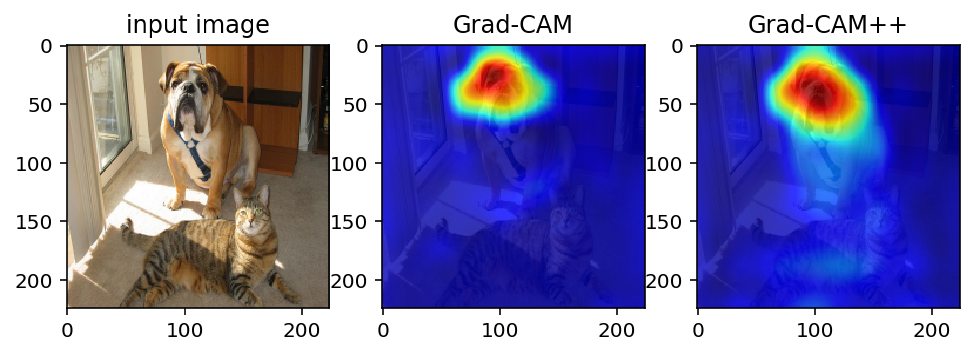

image/multiple_dogs.jpg
class activation map for: ('n02090622', 'borzoi', 0.2018977)


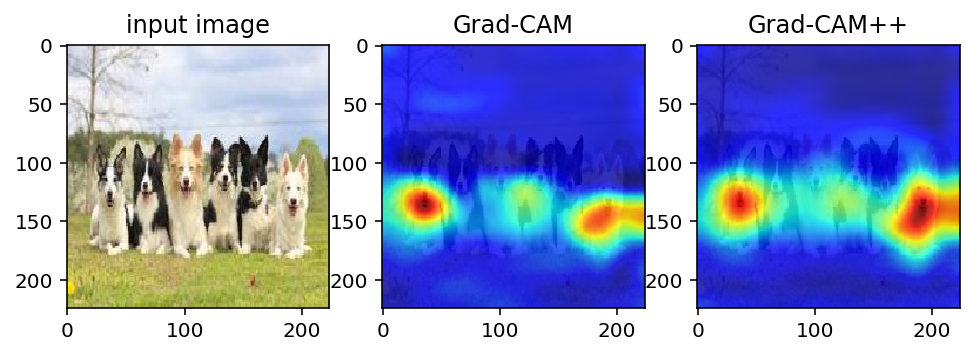

image/collies.JPG
class activation map for: ('n02106166', 'Border_collie', 0.67478704)


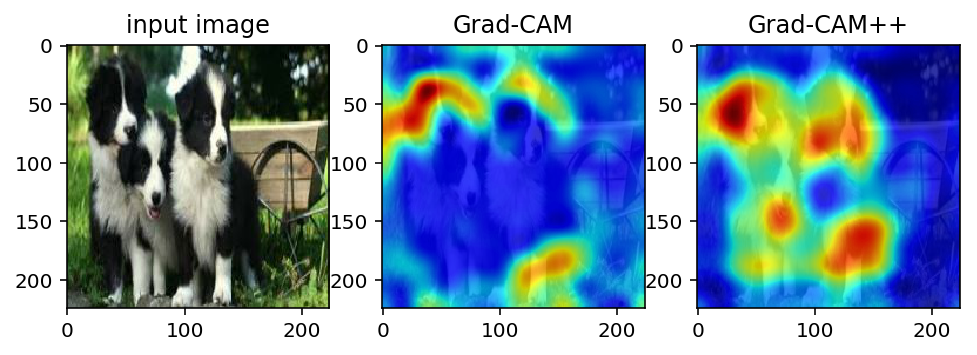

image/snake.JPEG
class activation map for: ('n01751748', 'sea_snake', 0.5346081)


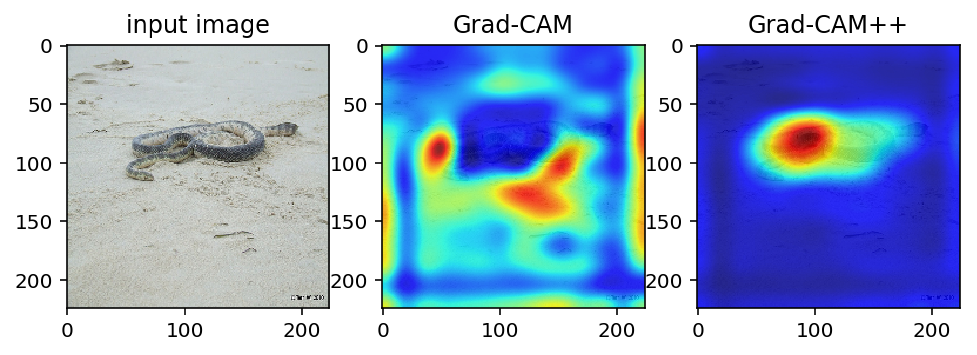

image/water-bird.JPEG
class activation map for: ('n02006656', 'spoonbill', 0.9999374)


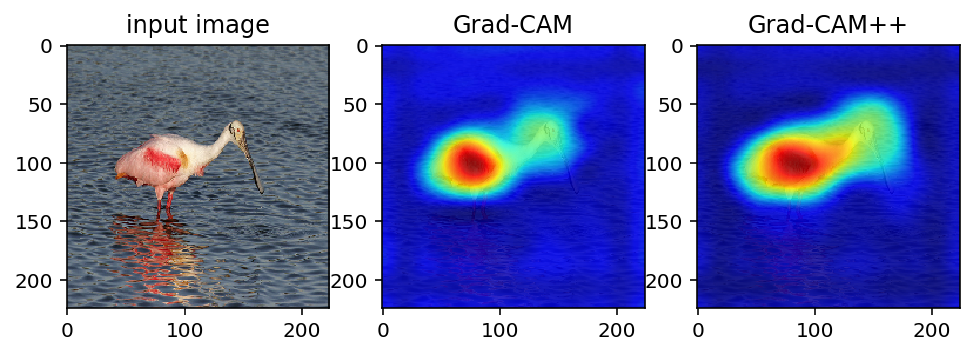

In [109]:
paths = ["cat_dog.png","multiple_dogs.jpg","collies.JPG","snake.JPEG","water-bird.JPEG"]
for path in paths:
    path = os.path.join("image",path)
    orig_img = np.array(load_img(path,target_size=(224,224)),dtype=np.uint8)
    img = np.array(load_img(path,target_size=(224,224)),dtype=np.float64)
    img = np.expand_dims(img,axis=0)
    img = preprocess_input(img)
    predictions = model.predict(img)
    top_n = 5
    top = decode_predictions(predictions, top=top_n)[0]
    cls = np.argsort(predictions[0])[-top_n:][::-1]
    
    gradcam=gradcamutils.grad_cam(model,img,layer_name='block5_conv3')
    gradcamplus=gradcamutils.grad_cam_plus(model,img,layer_name='block5_conv3')
    print(path)
    print("class activation map for:",top[0])
    fig, ax = plt.subplots(nrows=1,ncols=3)
    plt.subplot(131)
    plt.imshow(orig_img)
    plt.title("input image")
    plt.subplot(132)
    plt.imshow(orig_img)
    plt.imshow(gradcam,alpha=0.8,cmap="jet")
    plt.title("Grad-CAM")
    plt.subplot(133)
    plt.imshow(orig_img)
    plt.imshow(gradcamplus,alpha=0.8,cmap="jet")
    plt.title("Grad-CAM++")
    plt.show()